In [541]:
!git clone https://github.com/ufrpe-mineracao-textos/projeto-de-mineracao-20192-traducao-de-texto.git project

Cloning into 'project'...
remote: Enumerating objects: 1056, done.
remote: Counting objects: 100% (1056/1056), done.
remote: Compressing objects: 100% (984/984), done.
remote: Total 1056 (delta 13), reused 1019 (delta 4), pack-reused 0
Receiving objects: 100% (1056/1056), 96.19 MiB | 31.95 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [0]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow 

# MedianBlur + Threshhold



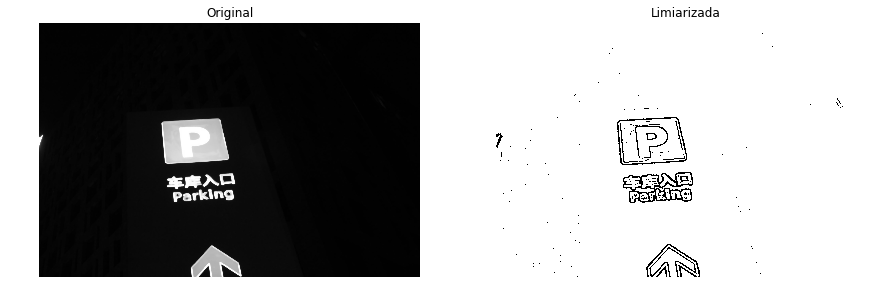

In [543]:
img = cv2.imread('project/processamento de imagens/test_images/msra/IMG_0081.JPG')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray = cv2.medianBlur(img_gray,7)


img_bin = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)  # imagem binária
# ret,img_bin = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY)


fig, axes = plt.subplots(1, 2, figsize=(15, 8))
ax = axes.ravel()

ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(img_bin, cmap='gray')
ax[1].set_title('Limiarizada')
ax[1].set_axis_off()


# Reverso

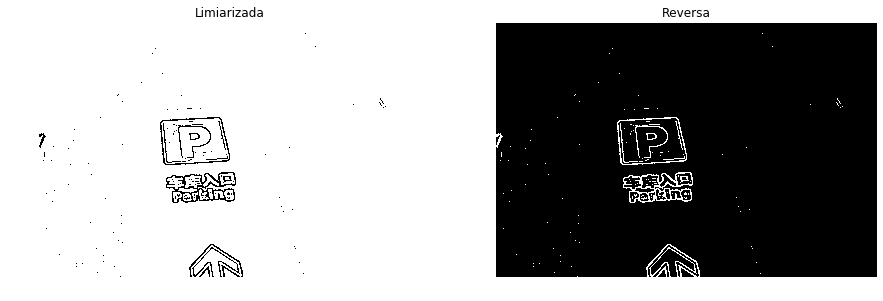

In [544]:
img_rev = cv2.bitwise_not(img_bin)  # imagem negativada

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
ax = axes.ravel()

ax[0].imshow(img_bin, cmap='gray')
ax[0].set_title('Limiarizada')
ax[0].set_axis_off()

ax[1].imshow(img_rev, cmap='gray')
ax[1].set_title('Reversa')
ax[1].set_axis_off()

# Segmentação

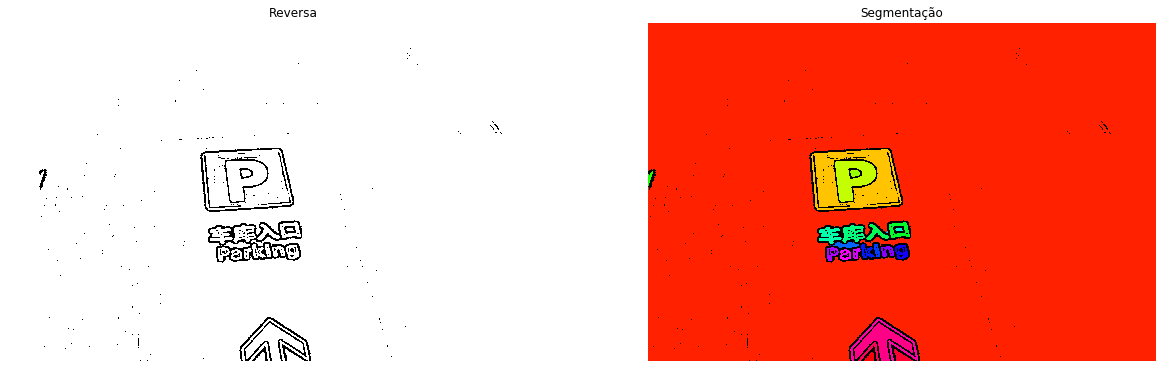

In [545]:
ret, labels = cv2.connectedComponents(img_bin)

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

labeled_img[label_hue==0] = 0

fig, axes = plt.subplots(1, 2, figsize=(20, 15))
ax = axes.ravel()

ax[0].imshow(img_bin, cmap='gray')
ax[0].set_title('Reversa')
ax[0].set_axis_off()

ax[1].imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Segmentação')
ax[1].set_axis_off()

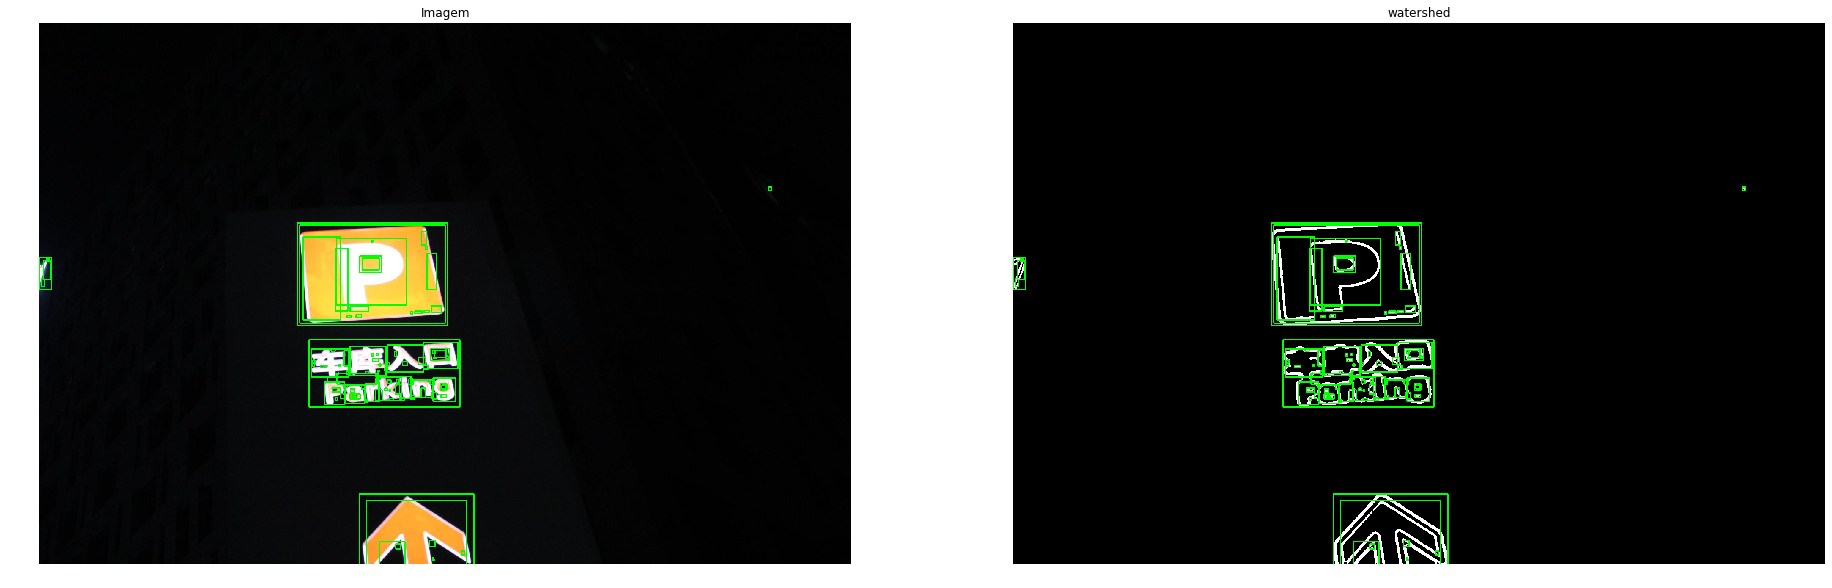

In [546]:
labeled_gray = cv2.cvtColor(labeled_img,cv2.COLOR_BGR2GRAY)
labeled_gray = cv2.medianBlur(labeled_gray,9)


# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(labeled_gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
# thresh = cv2.dilate(thresh,None,iterations = 3)
# thresh = cv2.erode(thresh,None,iterations = 2)

# Find the contours
_, contours, _= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
fig, axes = plt.subplots(1, 2, figsize=(32, 20))
ax = axes.ravel()

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem')
ax[0].set_axis_off()

ax[1].imshow(thresh_color)
ax[1].set_title('watershed')
ax[1].set_axis_off()
